In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
"plot dendrogram function from scikit-learn's example"
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

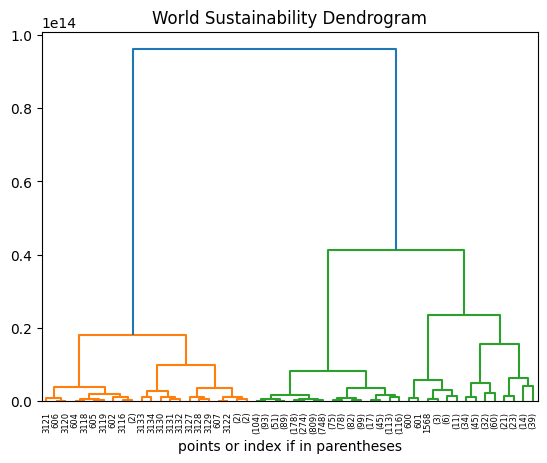

In [58]:
n = 5
data = pd.read_csv("../data/reduced_sustainability_data.csv")
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage = 'ward')
"set linkage = Ward, Maximum or complete linkage, Average linkage, Single linkage"
model.fit(data)
plt.title("World Sustainability Dendrogram")
"p determines depth of the dendrogram plot"
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("points or index if in parentheses")
plt.show()

In [ ]:
# metrics

In [ ]:
# print(f"Silhouette Coefficient: {metrics.silhouette_score(data, labels):.3f}")